Analysis:

    -Fox News is the most negative news source overall. With a compount sentiment of -0.15, it is the only news source to have a negative compount score
    -CBS has the most overall positive score. With +0.16, the BBC is the only news source that comes close with a +0.12. 
    -Though all of the results mentioned above can be easily seen in the bar grapg, looking at the scatter plot yields less revealing results, with the news sources' sentiments being scattered all over without any real trends based on that graph.

In [ ]:
#Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns
from config import consumer_key, consumer_secret, access_token, access_token_secret

#Start Vader Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Variables for holding sentiments
results_list = []

# Target User
target_user = ["@CNN","@BBC","@CBS","@FoxNews","@nytimes"]

In [4]:

# Loop through 5 pages of tweets (total 100 tweets)
for user  in target_user:  
    
    tweet_count = 100
    
    # Loop through each user
    for x in range(5):    
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page = x)
        
        # Loop through all tweets
        for tweet in public_tweets:

            #Run vader analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            results_list.append({
                                "News Source": user,
                                "Timestamp": tweet["created_at"],
                                "Compound": compound,
                                "Positive": pos,
                                "Neutral": neg,
                                "Negative": neu,
                                "Tweets Ago": tweet_count,
                                "Tweet Text": tweet["text"]
                                })
            
            tweet_count -= 1

print("Complete!")


Complete!


In [5]:
#Create a dataframe
news_df = pd.DataFrame.from_dict(results_list)
news_df.head()

,Compound,Negative,Neutral,News Source,Positive,Timestamp,Tweet Text,Tweets Ago
0,0.0000,1.000,0.000,@CNN,0.000,Sun Jul 22 00:30:00 +0000 2018,Watch this massive cargo plane pull off a loop...,100
1,0.0000,1.000,0.000,@CNN,0.000,Sun Jul 22 00:15:05 +0000 2018,New photo of Prince George released to mark hi...,99
2,-0.7184,0.543,0.337,@CNN,0.120,Sun Jul 22 00:00:14 +0000 2018,"It is wrong, dangerous and un-American for Pre...",98
3,-0.4019,0.787,0.213,@CNN,0.000,Sat Jul 21 23:45:03 +0000 2018,All 13 passengers survive WWII-era plane crash...,97
4,0.8883,0.566,0.000,@CNN,0.434,Sat Jul 21 23:37:03 +0000 2018,"Treasury Secretary Steven Mnuchin is ""very hop...",96


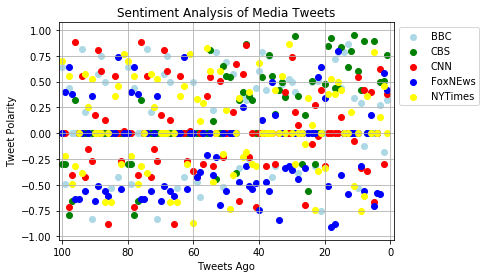

In [11]:
#Plot scatterplot graph.

# Set the x limit,
plt.xlim(101, -1)

#plot scatterplot
bbc_df = news_df.loc[news_df["News Source"] == '@BBC']
plt.scatter(bbc_df["Tweets Ago"],bbc_df["Compound"],label='BBC', color='lightblue')

cbs_df = news_df.loc[news_df["News Source"] == '@CBS']
plt.scatter(cbs_df["Tweets Ago"],cbs_df["Compound"],label='CBS', color='green')

cnn_df = news_df.loc[news_df["News Source"] == '@CNN']
plt.scatter(cnn_df["Tweets Ago"],cnn_df["Compound"],label='CNN', color='red')

fox_df = news_df.loc[news_df["News Source"] == '@FoxNews']
plt.scatter(fox_df["Tweets Ago"],fox_df["Compound"],label='FoxNEws', color='blue')

nyt_df = news_df.loc[news_df["News Source"] == '@nytimes']
plt.scatter(nyt_df["Tweets Ago"],nyt_df["Compound"],label='NYTimes', color='yellow')
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid(True)

plt.savefig("Files/Sentiment Analysis of Media Tweets.png")
plt.show()

In [13]:
avg_sent = news_df.groupby("News Source")["Compound"].mean()
avg_sent

News Source
@BBC        0.122759
@CBS        0.157106
@CNN        0.028490
@FoxNews   -0.154804
@nytimes    0.057311
Name: Compound, dtype: float64

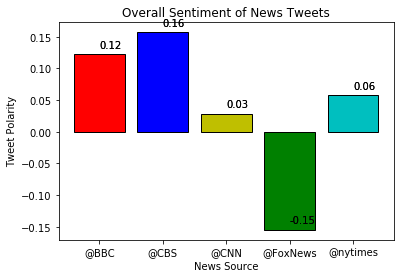

In [25]:
# Set the values for x_axis & y_axis# Set th 
x_axis = avg_sent.index.values
y_axis = news_df["Compound"].mean()
count = 0
for sent in avg_sent:
    plt.text(count, sent +.01, str(round(sent,2)))
    count = count + 1
plt.bar(x_axis, avg_sent, tick_label = xlabels, color = ['r', 'b', 'y', 'g', 'c'], edgecolor=['black']*len(x_axis))

#Set title, x axis label, and y axis label.
plt.title("Overall Sentiment of News Tweets")
plt.xlabel("News Source")
plt.ylabel("Tweet Polarity")

plt.savefig("Files/Overall Sentiment of News Tweets.png")
plt.show()